In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from sklearn import svm

In [5]:
data=pd.read_csv('letterdata.csv')

In [7]:
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [9]:
data.shape

(20000, 17)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [13]:
data.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [17]:
def getaccuracy(testset,predictions):
    correct=0
    for x in range(len(testset)):
        if(testset[x]==predictions[x]):
            correct+=1
    return (correct/float(len(testset)))*100.0

In [19]:
x,y=np.array(data)[:,1:16],np.array(data.letter)[:]

In [46]:
x_train=x[:16000,:]
x_test=x[16001:,:]
y_train=y[:16000]
y_test=y[16001:]

In [48]:
model=svm.SVC(gamma=0.025,C=3)

In [50]:
model.fit(x_train,y_train)

SVC(C=3, gamma=0.025)

In [51]:
y_pred=model.predict(x_test)

In [54]:
getaccuracy(y_test,y_pred)

96.07401850462615

In [56]:
y_grid=(np.column_stack([y_test,y_pred]))

In [58]:
print(y_grid)

[['N' 'N']
 ['V' 'V']
 ['I' 'I']
 ...
 ['T' 'T']
 ['S' 'S']
 ['A' 'A']]


In [60]:
np.savetxt("letter.csv",y_grid,fmt='%s')

In [62]:
from sklearn import metrics

In [64]:
import string
l=list(string.ascii_uppercase[0:26])

In [68]:
cm=metrics.confusion_matrix(y_test,y_pred,labels=l)

In [70]:
df_cm=pd.DataFrame(cm,index=[i for i in l],columns=[i for i in l])

<Axes: >

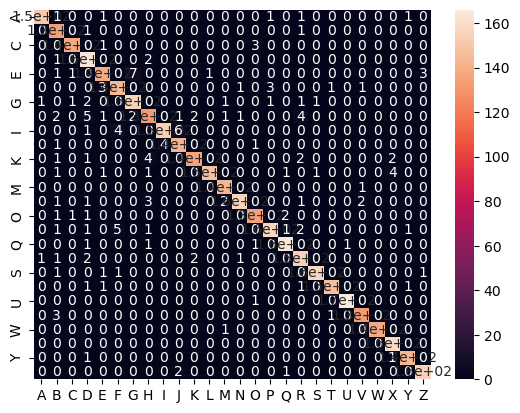

In [72]:
sns.heatmap(df_cm,annot=True)